## Introduction

The purpose of this notebook is to prepare the dataset for for analysis exploring relationships between housing market factors and homelessness in King County WA.


The dataset comes from the U.S. Department of Housing and Urban Development (HUD), which contains various housing market factors as well as homelessness data. 
Link to the report regarding the HUD dataset: https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf 

Link to the dataset in this repository (before data cleaning): https://raw.githubusercontent.com/pintoanabel/homelessness/main/05b_analysis_file_update.csv

We will investigate whether there are alternative modeling approaches that outperform the models described in the HUD report.


## Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

The [data](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/05b_analysis_file_update.csv) for this project are described in HUD's report [Market Predictors of Homelessness](https://www.huduser.gov/portal/sites/default/files/pdf/Market-Predictors-of-Homelessness.pdf) in the section titled DATA.

I will refer you to this section of the HUD report for a detailed description of the sources of the data and how they were processed.

The data dictionary [HUD TO3 - 05b Analysis File - Data Dictionary.csv](https://github.com/brian-fischer/DATA-3320/blob/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv) contains descriptions of all variables in the data set.




## Load the data

In [24]:
hud = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/homelessness/05b_analysis_file_update.csv')

Load the data dictionary from the HUD Report

In [25]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/homelessness/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20-%20Dictionary.csv')

## Explore the contents of the data set

What variable(s) do we want to predict? `rate_homelessness`

What variables seem useful as predictors? 

Are any predictor variables redundant?
all of the total values were turned into rates, so all of the totals are therefore redundant.


In [26]:
hud

,year,cocnumber,pit_tot_shelt_pit_hud,pit_tot_unshelt_pit_hud,pit_tot_hless_pit_hud,pit_ind_shelt_pit_hud,pit_ind_unshelt_pit_hud,pit_ind_hless_pit_hud,pit_perfam_shelt_pit_hud,pit_perfam_unshelt_pit_hud,...,sub_high_cost_rent75,sub_high_cost_homeval75,sub_high_rent_share75,tight_high_cost_rental_mkt,sub_tight_high_cost_rent,sub_west_coast_all_urb,sub_west_census,major_city,suburban,rural
0,2010,AK-500,1113.0,118.0,1231.0,633.0,107.0,740.0,480.0,11.0,...,1,1,1,3,1,1,1,1,0,0
1,2011,AK-500,1082.0,141.0,1223.0,677.0,117.0,794.0,405.0,24.0,...,1,1,0,3,1,1,1,1,0,0
2,2012,AK-500,1097.0,50.0,1147.0,756.0,35.0,791.0,341.0,15.0,...,1,1,1,3,1,1,1,1,0,0
3,2013,AK-500,1070.0,52.0,1122.0,792.0,52.0,844.0,278.0,0.0,...,1,1,0,3,1,1,1,1,0,0
4,2014,AK-500,970.0,53.0,1023.0,688.0,48.0,736.0,282.0,5.0,...,1,1,1,3,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,2013,WY-500,501.0,452.0,953.0,306.0,371.0,677.0,195.0,81.0,...,0,0,0,0,0,0,1,0,0,1
3004,2014,WY-500,563.0,194.0,757.0,327.0,136.0,463.0,236.0,58.0,...,1,1,1,3,1,0,1,0,0,1
3005,2015,WY-500,507.0,291.0,798.0,292.0,208.0,500.0,215.0,83.0,...,0,0,0,0,0,0,1,0,0,1
3006,2016,WY-500,491.0,366.0,857.0,277.0,240.0,517.0,214.0,126.0,...,1,1,1,3,1,0,1,0,0,1


In [27]:
dictionary

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
...,...,...,...,...,...,...
327,Subgroup,sub_west_coast_all_urb,indicator for suburban or major city/largely u...,No,NaN,NaN
328,Subgroup,sub_west_census,indicator for west region CoCs,No,NaN,NaN
329,Subgroup,major_city,indicator for major city or largely urban CoC,No,HUD,NaN
330,Subgroup,suburban,indicator for largely suburban CoC,No,HUD,NaN


## Select relevant subsets of the data

We are keeping variables in the dataframe that could potentially be predictors of homelessness, and anything else that seems interesting to keep

In [28]:
columns_to_keep = ["year", "cocnumber",
  
                  "pit_tot_hless_pit_hud", "pit_tot_shelt_pit_hud", "pit_tot_unshelt_pit_hud","dem_pop_pop_census",
  
                  "fhfa_hpi_2009", "ln_hou_mkt_medrent_xt", "hou_mkt_utility_xt", "hou_mkt_burden_own_acs5yr_2017", "hou_mkt_burden_sev_rent_acs_2017", "hou_mkt_rentshare_acs5yr_2017", "hou_mkt_rentvacancy_xt", "hou_mkt_density_dummy", "hou_mkt_evict_count", "hou_mkt_ovrcrowd_acs5yr_2017", "major_city", "suburban",
           
                  "econ_labor_unemp_rate_BLS", "econ_labor_incineq_acs5yr_2017", "econ_labor_pov_pop_census_share",
           
                  "hou_pol_hudunit_psh_hud_share", "hou_pol_occhudunit_psh_hud", "hou_mkt_homeage1940_xt",
           
                  "dem_soc_black_census", "dem_soc_hispanic_census", "dem_soc_asian_census", "dem_soc_pacific_census", "dem_pop_child_census", "dem_pop_senior_census", "dem_pop_female_census", "dem_pop_mig_census", "d_dem_pop_mig_census_share", "dem_soc_singadult_xt", "dem_soc_singparent_xt", "dem_soc_vet_xt", "dem_soc_ed_lessbach_xt", "dem_health_cost_dart", "dem_health_excesdrink_chr",
           
                  "env_wea_avgtemp_noaa", "env_wea_avgtemp_summer_noaa", "env_wea_precip_noaa", "env_wea_precip_annual_noaa"]
    

In [29]:
df_kept = hud[columns_to_keep]

## Rename columns

Rename all variables to give them informative names

In [30]:
df_kept = df_kept.rename(columns = {"cocnumber":"coc_number",
  
                          "pit_tot_hless_pit_hud":"total_homeless", 
                          "pit_tot_shelt_pit_hud":"total_sheltered", 
                          "pit_tot_unshelt_pit_hud":"total_unsheltered",
                          "dem_pop_pop_census":"total_population",
  
                          "fhfa_hpi_2009":"house_price_index_2009", 
                          "ln_hou_mkt_medrent_xt":"log_median_rent", 
                          "hou_mkt_utility_xt":"utility_costs", 
                          "hou_mkt_burden_own_acs5yr_2017":"percentage_owners_cost_burden_2016", 
                          "hou_mkt_burden_sev_rent_acs_2017":"percentage_renters_severe_cost_burden_2016", 
                          "hou_mkt_rentshare_acs5yr_2017":"share_renters_2016", 
                          "hou_mkt_rentvacancy_xt":"rental_vacancy_rate", 
                          "hou_mkt_density_dummy":"high_housing_density", 
                          "hou_mkt_evict_count":"number_eviction", 
                          "hou_mkt_ovrcrowd_acs5yr_2017":"share_overcrowded_units_2016", 
                          "major_city":"city_or_urban", 
           
                          "econ_labor_unemp_rate_BLS":"rate_unemployment", 
                          "econ_labor_incineq_acs5yr_2017":"gini_coefficient_2016", 
                          "econ_labor_pov_pop_census_share":"poverty_rate",
           
                          "hou_pol_hudunit_psh_hud_share":"share_HUD_units", 
                          "hou_pol_occhudunit_psh_hud":"HUD_unit_occupancy_rate", 
                          "hou_mkt_homeage1940_xt":"share_built_before_1940",
           
                          "dem_soc_black_census":"total_black", 
                          "dem_soc_hispanic_census":"total_latino_hispanic", 
                          "dem_soc_asian_census":"total_asian", 
                          "dem_soc_pacific_census":"total_pacific_islander", 
                          "dem_pop_child_census":"total_population_0_19", 
                          "dem_pop_senior_census":"total_population_65_plus", 
                          "dem_pop_female_census":"total_female_population", 
                          "dem_pop_mig_census":"net_migration", 
                          "d_dem_pop_mig_census_share":"migration_4_year_change", 
                          "dem_soc_singadult_xt":"proportion_one_person_households", 
                          "dem_soc_singparent_xt":"share_under_18_with_single_parent", 
                          "dem_soc_vet_xt":"share_veteran_status", 
                          "dem_soc_ed_lessbach_xt":"share_no_bachelors", 
                          "dem_health_cost_dart":"medicare_reimbursements_per_enrollee", 
                          "dem_health_excesdrink_chr":"percentage_excessive_drinking",
           
                          "env_wea_avgtemp_noaa":"average_Jan_temperature", 
                          "env_wea_avgtemp_summer_noaa":"average_summer_temperature", 
                          "env_wea_precip_noaa":"total_Jan_precipitation", 
                          "env_wea_precip_annual_noaa":"total_annual_precipitation"})

In [31]:
df_kept.head()

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
0,2010,AK-500,1231.0,1113.0,118.0,285194,0.000000,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.78885,NaN,18.400000,56.599998,0.68,12.560000
1,2011,AK-500,1223.0,1082.0,141.0,293370,0.009359,2.266958,9.3,15.334315,...,24.832815,21.77351,17.23423,66.952057,7.85001,NaN,18.799999,55.799999,0.52,15.560000
2,2012,AK-500,1147.0,1097.0,50.0,296291,-0.049137,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.90594,NaN,2.900000,55.900002,1.17,16.459999
3,2013,AK-500,1122.0,1070.0,52.0,298520,-0.255042,2.266958,9.3,15.334315,...,24.832815,21.77351,17.23423,66.952057,7.83198,NaN,23.299999,56.000000,1.10,20.270000
4,2014,AK-500,1023.0,970.0,53.0,301081,3.170481,NaN,NaN,15.334315,...,NaN,NaN,NaN,NaN,7.95718,NaN,30.299999,60.099998,1.52,24.010000


### Explore the data sources

Use the dictionary to find the unique `Associated Domain` values.

In [32]:
unique_domains = dictionary['Associated Domain'].unique()
print(unique_domains)

['Identifier' 'Outcome' 'Secondary Outcome' 'Subgroup' 'Safety Net'
 'Demographic' 'Housing' 'Economic' 'Local Policy' 'Climate' 'Geography']


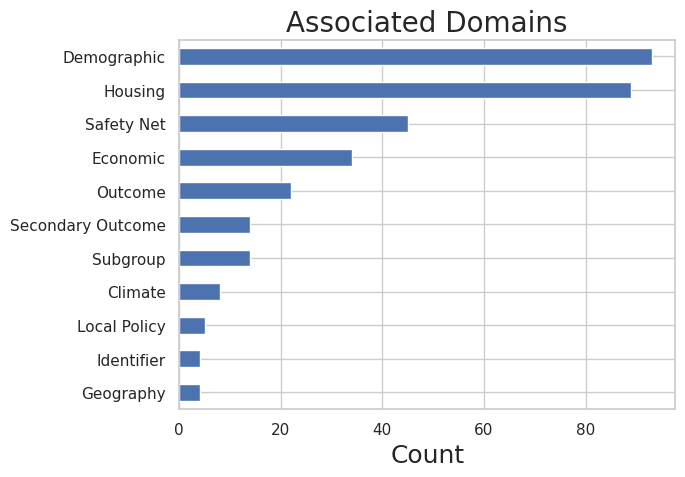

In [34]:
dictionary['Associated Domain'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=18)
plt.title('Associated Domains', fontsize=20);

Demographic data is our largest associated domain


Make a bar graph of the counts of different data sources described in `Source or Root Variable`. Your graph should have the following features:

1. Order the bars in descending order based on the count.
2. Only include the 10 most common data sources.
3. Orient the plot so that it is easy to read the labels.


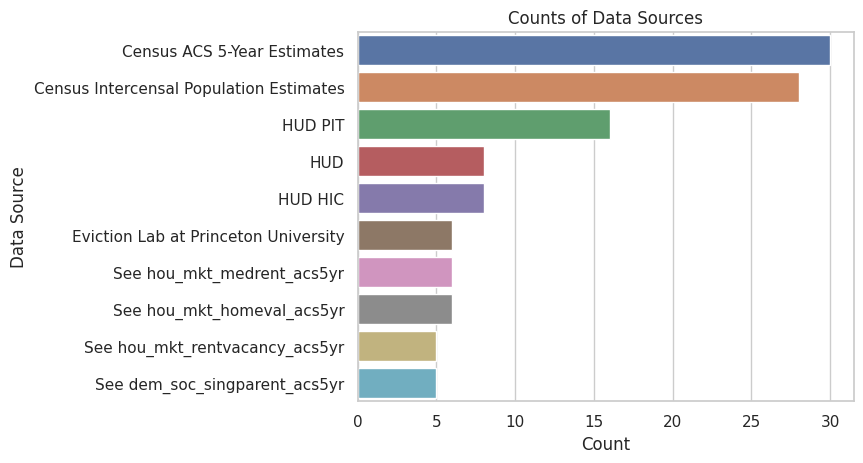

In [33]:
counts = dictionary['Source or Root Variable'].value_counts().head(10)
sns.barplot(x = counts.values, y = counts.index, orient = 'horizontal')
plt.xlabel('Count')
plt.ylabel('Data Source')
plt.title("Counts of Data Sources")
plt.show()

Census estimates are the biggest contributor to the data

Create a matrix to visualize missing values

<Axes: >

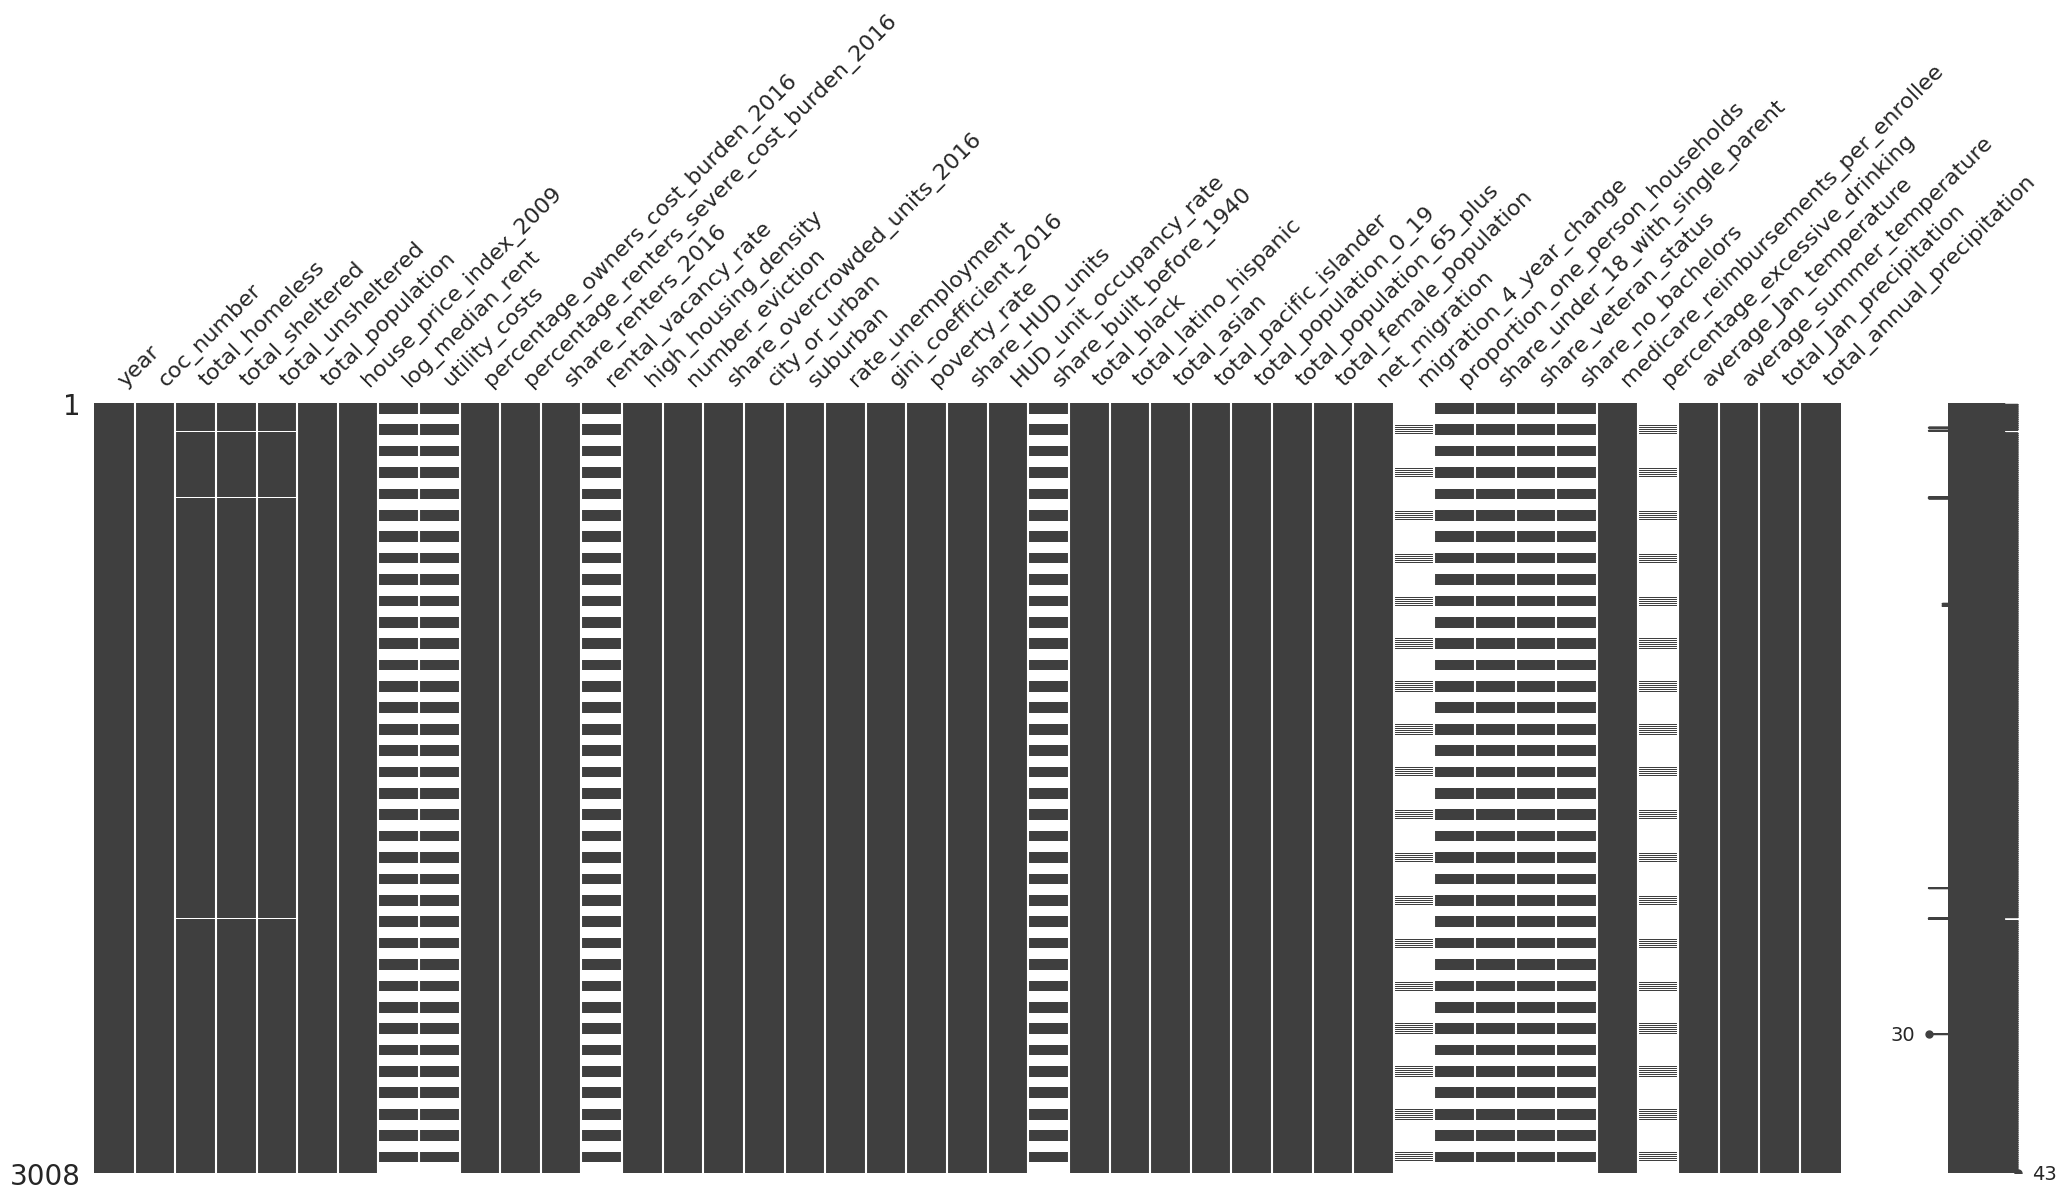

In [35]:
msno.matrix(df_kept)

## Quality Control

Correlation Matrix

<ipython-input-36-6c09f06ae9ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_kept.corr()


<Axes: >

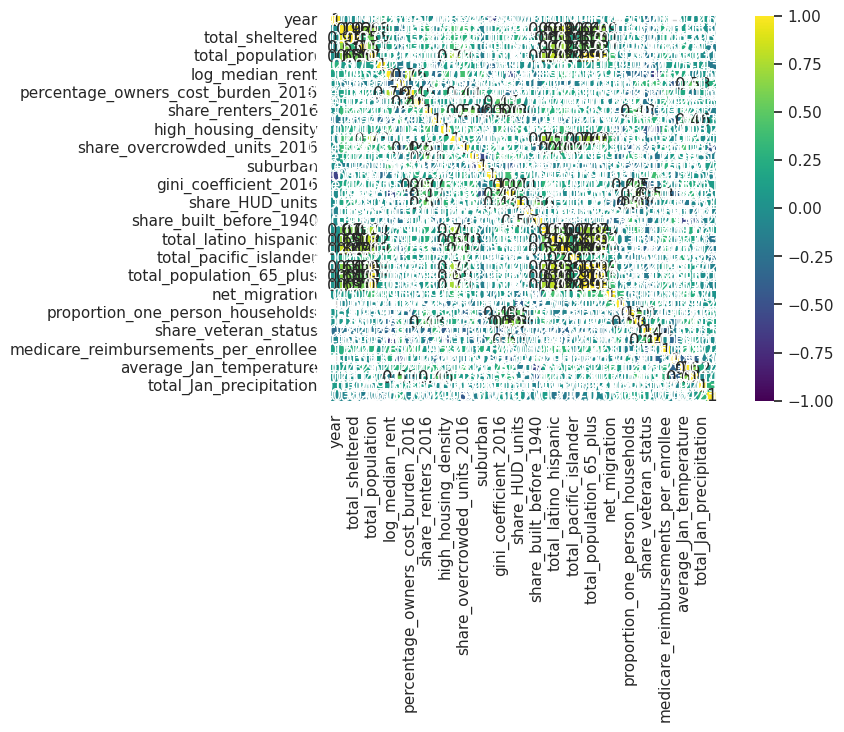

In [36]:
corr_matrix = df_kept.corr() 

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')


In [37]:
## sns.scatterplot(data = df_kept, x = ['log_median_rent', 'utility_costs', 'rental_vacancy_rate', 'share_built_before_1940', 'migration_4_year_change', 'proportion_one_person_households', 'share_under_18_with_single_parent', 'share_veteran_status', 'share_no_bachelors', 'percentage_excessive_drinking'], y = 'time')

Create a new small dictionary that only includes the variables in our new smaller df

In [38]:
small_dict = dictionary[dictionary['Variable'].isin(columns_to_keep)]

small_dict

,Associated Domain,Variable,Variable Label,Derived,Source or Root Variable,Table Name(s)
0,Identifier,year,year,No,NaN,NaN
1,Identifier,cocnumber,continuum of care number,No,HUD,NaN
2,Outcome,pit_tot_shelt_pit_hud,total sheltered - HUD PIT,No,HUD PIT,NaN
3,Outcome,pit_tot_unshelt_pit_hud,total unsheltered - HUD PIT,No,HUD PIT,NaN
4,Outcome,pit_tot_hless_pit_hud,total homeless - HUD PIT,No,HUD PIT,NaN
32,Demographic,dem_pop_pop_census,"total population, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
34,Demographic,dem_pop_female_census,"total female population, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
35,Demographic,dem_pop_child_census,"total population ages 0-19, intercensal estimate",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
37,Demographic,dem_pop_senior_census,"total population ages 65 or older, intercensal...",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."
39,Demographic,dem_soc_black_census,"total black alone (non-hispanic) population, i...",No,Census Intercensal Population Estimates,"""Annual County Resident Population Estimates b..."


Plot the associated domain counts again, this time with only the variables that we kept

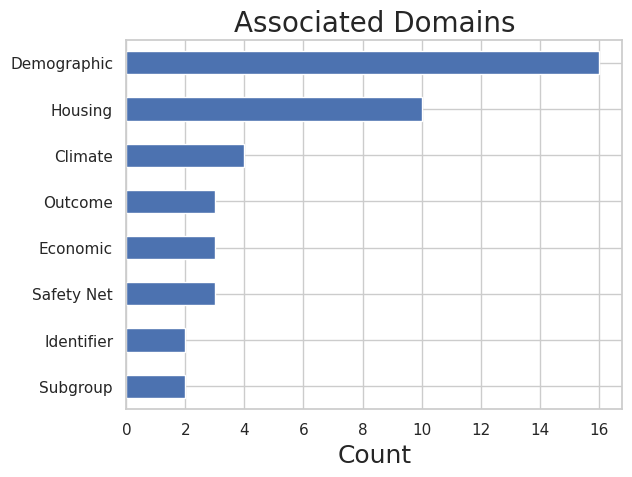

In [39]:
small_dict['Associated Domain'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=18)
plt.title('Associated Domains', fontsize=20);

Demographic data is still our largest associated domain

Plot the counts of the sources of the data again, this time with only the variables that we decided to keep

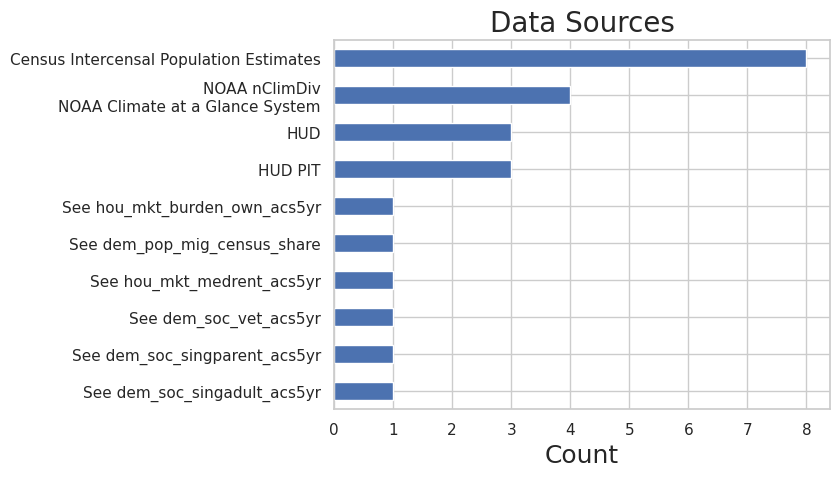

In [40]:
small_dict['Source or Root Variable'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()

plt.xlabel('Count', fontsize=18)
plt.title('Data Sources', fontsize=20);

Census estimates are still our biggest data contributor

Create a heatmap of all of our kept variables, excluding missing values

<ipython-input-41-10f5086aa9f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_kept.dropna().corr(), vmin=-1, vmax=1)


<Axes: >

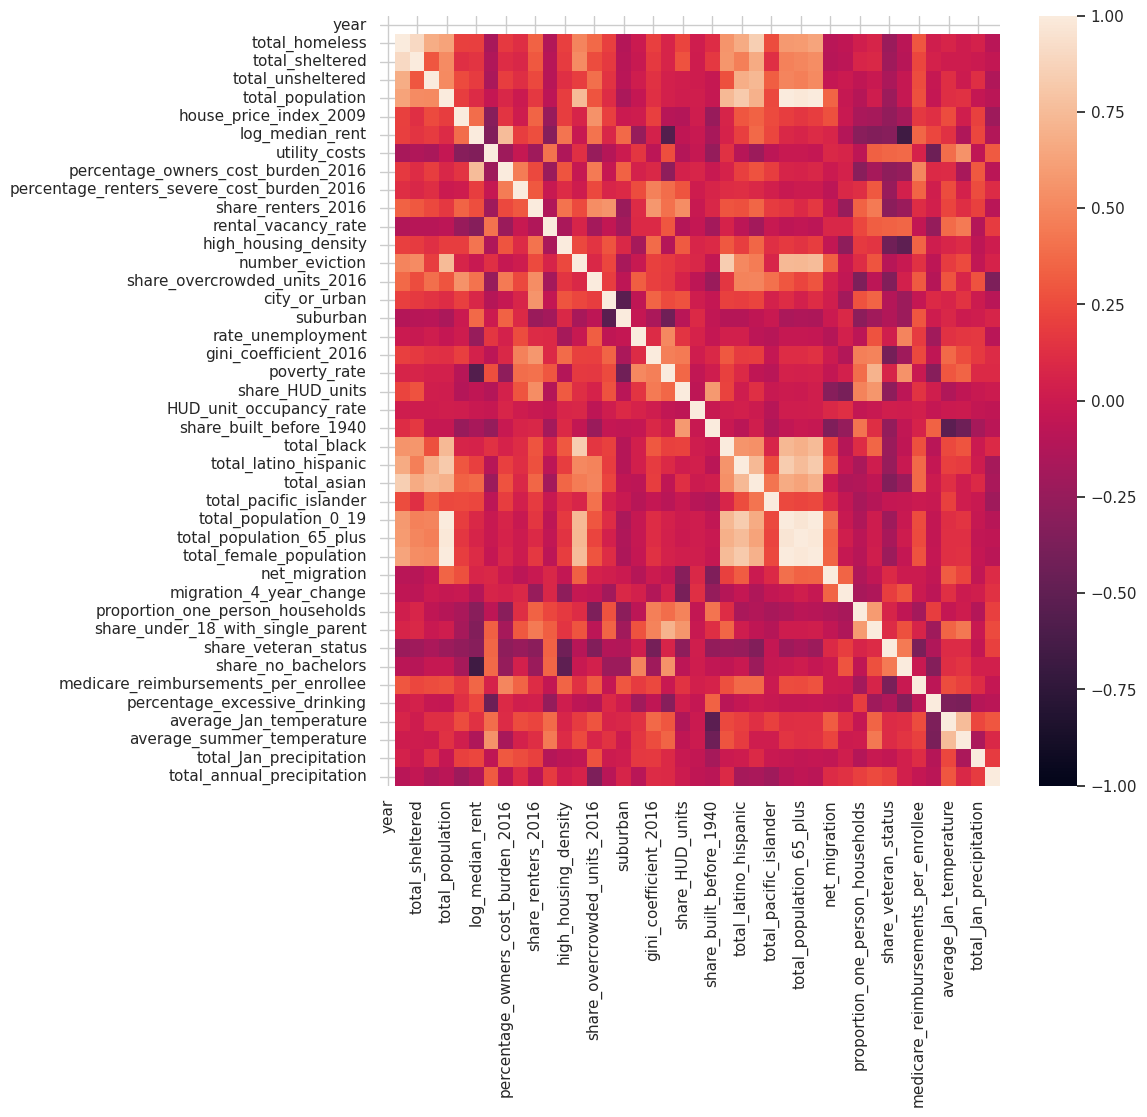

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df_kept.dropna().corr(), vmin=-1, vmax=1)

##Quality Control

Check the ranges of the data

In [42]:
df_kept.agg(['min','max']).T

,min,max
year,2010,2017
coc_number,AK-500,WY-500
total_homeless,7.0,76501.0
total_sheltered,3.0,72565.0
total_unsheltered,0.0,42828.0
total_population,29344,11058958
house_price_index_2009,-26.497087,63.864007
log_median_rent,1.239243,2.874838
utility_costs,5.6,22.6
percentage_owners_cost_burden_2016,8.072322,22.955448


## Identify and deal with missing values

Determine whether there are missing values in the data set. Determine whether you have missing values after focusing on the relevant subset of the data.

<Axes: >

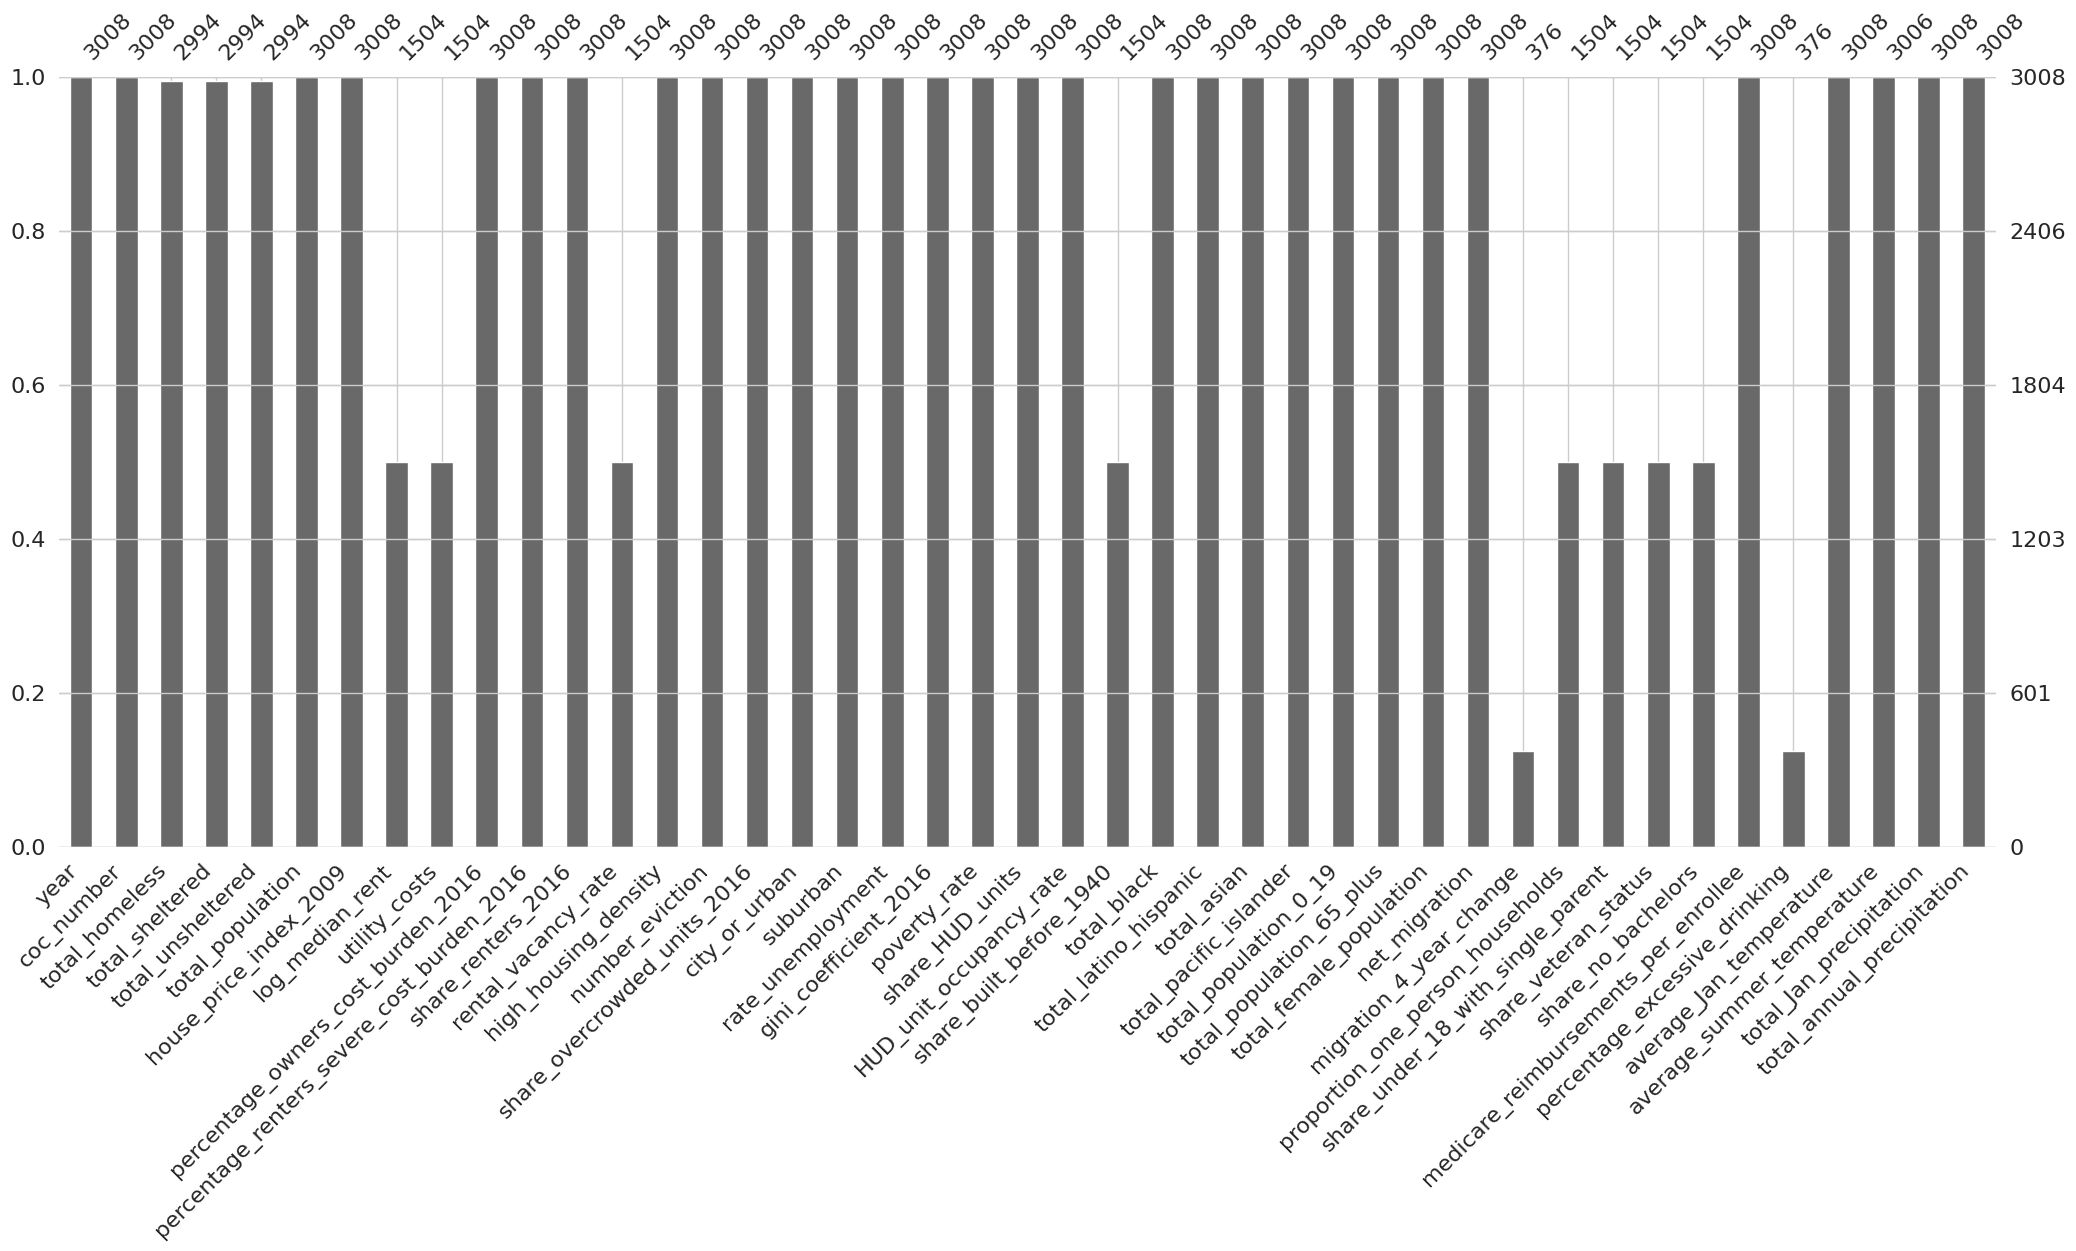

In [43]:
msno.bar(df_kept)

Modify the dataframe to exclude all data that is missing homelessness records

In [44]:
df = df_kept.loc[df_kept['total_homeless'].notna()]

Modify the df to only inlcude data from the year 2017

In [45]:
df = df.loc[df['year'] == 2017]

In [46]:
df

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,proportion_one_person_households,share_under_18_with_single_parent,share_veteran_status,share_no_bachelors,medicare_reimbursements_per_enrollee,percentage_excessive_drinking,average_Jan_temperature,average_summer_temperature,total_Jan_precipitation,total_annual_precipitation
7,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,25.046440,23.379078,14.535126,65.634148,8.751520,0.193317,13.800000,60.799999,1.710000,16.500000
15,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,25.689878,19.786558,14.142518,75.560379,9.972870,0.218806,13.800000,60.799999,1.710000,16.500000
23,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,29.430130,32.077599,9.149558,65.983711,9.318163,0.166727,50.995346,80.874313,6.669876,38.593376
31,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,28.982967,33.668129,11.647923,74.543457,8.709522,0.165461,57.893360,81.939949,12.296666,58.519012
39,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,28.329298,27.959316,9.135015,82.332657,8.967195,0.149407,48.382103,79.429985,5.462999,44.778618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2017,WV-500,118.0,111.0,7.0,142272,8.888932,1.459895,16.585392,8.072322,...,32.257992,26.413492,11.331009,77.122894,10.197977,0.128468,35.109627,73.512047,4.164744,42.280125
2983,2017,WV-501,205.0,173.0,32.0,136349,2.793695,1.595035,17.695057,9.171934,...,34.274738,29.276711,10.428111,76.023590,9.372940,0.121457,40.581108,76.372177,4.309402,43.476166
2991,2017,WV-503,319.0,270.0,49.0,274427,3.041601,1.649177,17.768978,8.460396,...,30.329165,26.634947,10.506406,75.165283,9.367138,0.129815,40.225986,75.255028,4.353291,42.982872
2999,2017,WV-508,667.0,567.0,100.0,1275589,4.995708,1.587101,16.804708,9.594313,...,28.878338,23.425161,11.278491,79.828537,9.516158,0.125816,37.575474,73.176598,4.592812,43.718338


Check that we got rid of all missing values

In [47]:
df.isna().sum()

year                                          0
coc_number                                    0
total_homeless                                0
total_sheltered                               0
total_unsheltered                             0
total_population                              0
house_price_index_2009                        0
log_median_rent                               0
utility_costs                                 0
percentage_owners_cost_burden_2016            0
percentage_renters_severe_cost_burden_2016    0
share_renters_2016                            0
rental_vacancy_rate                           0
high_housing_density                          0
number_eviction                               0
share_overcrowded_units_2016                  0
city_or_urban                                 0
suburban                                      0
rate_unemployment                             0
gini_coefficient_2016                         0
poverty_rate                            

Check how many features our full model has

In [48]:
df.shape

(374, 43)

We have 43 predictors included, which is a lot even still

## Create relevant derived variables as new columns

Convert totals to rates per 10,000 (%)

In [50]:
df['rate_homeless'] = df['total_homeless'] / (df['total_population'] / 10_000)
df['rate_sheltered'] = df['total_sheltered'] / (df['total_population'] / 10_000)
df['rate_unsheltered'] = df['total_unsheltered'] / (df['total_population'] / 10_000)

No need to divide demographic variables by 1000 because we will standardize them later

In [51]:
df['percent_black'] = df['total_black'] / df['total_population']
df['percent_latino_hispanic'] = df['total_latino_hispanic'] / df['total_population']
df['percent_asian'] = df['total_asian'] / df['total_population']
df['percent_pacific_islander'] = df['total_pacific_islander'] / df['total_population']
df['percent_population_0_19'] = df['total_population_0_19'] / df['total_population']
df['percent_population_65_plus'] = df['total_population_65_plus'] / df['total_population']
df['percent_female_population'] = df['total_female_population'] / df['total_population']

In [52]:
df

,year,coc_number,total_homeless,total_sheltered,total_unsheltered,total_population,house_price_index_2009,log_median_rent,utility_costs,percentage_owners_cost_burden_2016,...,rate_homeless,rate_sheltered,rate_unsheltered,percent_black,percent_latino_hispanic,percent_asian,percent_pacific_islander,percent_population_0_19,percent_population_65_plus,percent_female_population
7,2017,AK-500,1128.0,973.0,155.0,297376,11.743647,2.438863,8.500000,15.334315,...,37.931777,32.719520,5.212257,0.053811,0.089967,0.093952,0.024387,0.269161,0.099140,0.489629
15,2017,AK-501,717.0,578.0,139.0,444146,9.042710,2.249699,14.607715,13.311670,...,16.143340,13.013739,3.129602,0.019530,0.055727,0.040104,0.004593,0.278562,0.109905,0.467752
23,2017,AL-500,1092.0,875.0,217.0,958302,-0.852477,1.862248,19.492331,12.188416,...,11.395155,9.130733,2.264422,0.331147,0.040843,0.016632,0.000311,0.256410,0.149058,0.521677
31,2017,AL-501,606.0,341.0,265.0,622361,-8.507004,1.858394,18.899839,12.539132,...,9.737114,5.479135,4.257979,0.266807,0.033816,0.016889,0.000382,0.254735,0.167126,0.519669
39,2017,AL-502,155.0,133.0,22.0,265264,0.751167,1.362010,18.803186,10.374694,...,5.843235,5.013873,0.829362,0.090348,0.042056,0.004901,0.000471,0.236545,0.190708,0.513937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,2017,WV-500,118.0,111.0,7.0,142272,8.888932,1.459895,16.585392,8.072322,...,8.293972,7.801957,0.492015,0.020074,0.011239,0.005103,0.000098,0.216459,0.213703,0.511886
2983,2017,WV-501,205.0,173.0,32.0,136349,2.793695,1.595035,17.695057,9.171934,...,15.034947,12.688029,2.346919,0.035123,0.011837,0.009916,0.000132,0.232763,0.185069,0.510895
2991,2017,WV-503,319.0,270.0,49.0,274427,3.041601,1.649177,17.768978,8.460396,...,11.624221,9.838682,1.785539,0.053985,0.010403,0.009529,0.000255,0.230819,0.188192,0.514122
2999,2017,WV-508,667.0,567.0,100.0,1275589,4.995708,1.587101,16.804708,9.594313,...,5.228957,4.445005,0.783952,0.032104,0.017506,0.007858,0.000220,0.229239,0.185788,0.502335


## Export the clean .csv file

Export the clean data set

In [ ]:
from google.colab import files

df.to_csv('clean_homelessness.csv', encoding = 'utf-8-sig', index=False) 

files.download('clean_homelessness.csv')